<a href="https://colab.research.google.com/github/Michal-sw/JumpShot-Analysis/blob/main/my_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from imutils.video import VideoStream
import argparse
import datetime
import imutils
import time
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# Donwload video
vs = cv2.VideoCapture('/content/drive/MyDrive/Projekt_WZI/Przyciety_rzut.mp4')

firstFrame = None
resultAsSum = None
framesSummed = []


###Source Video:
![alt text](https://s3.gifyu.com/images/ezgif-2-32c95695099a.gif)


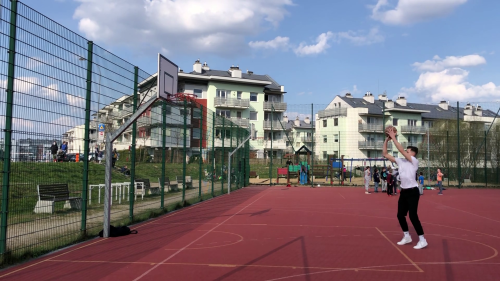

In [3]:
# frame fetch test
frame = vs.read()[1]
frame = imutils.resize(frame, width=500)
cv2_imshow(frame)

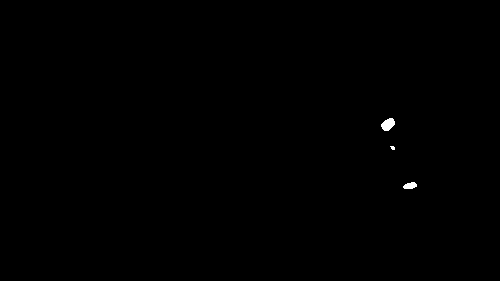

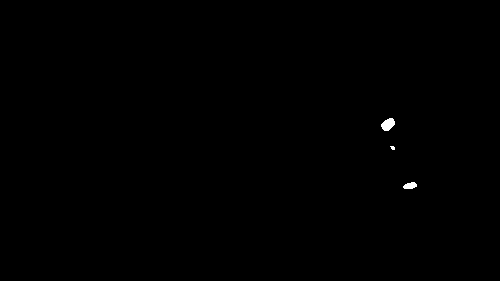

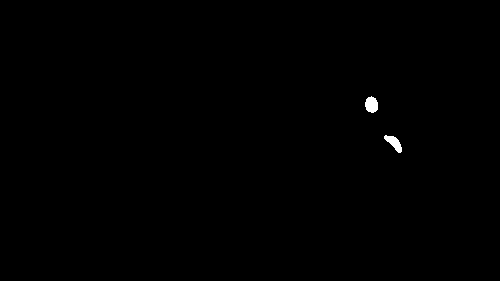

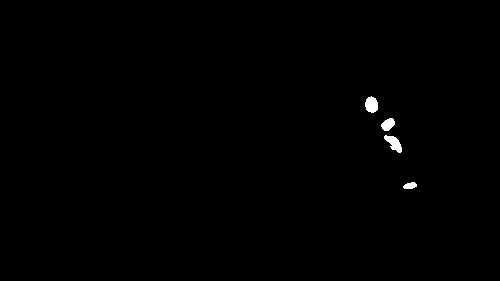

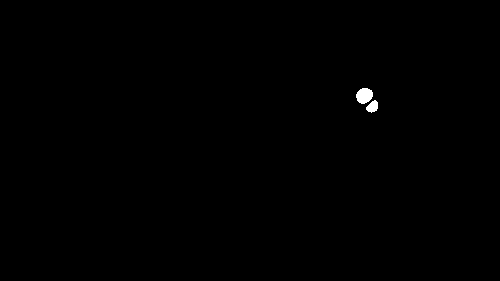

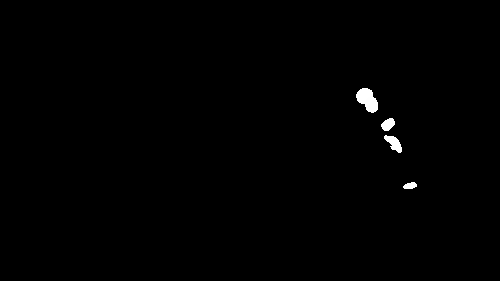

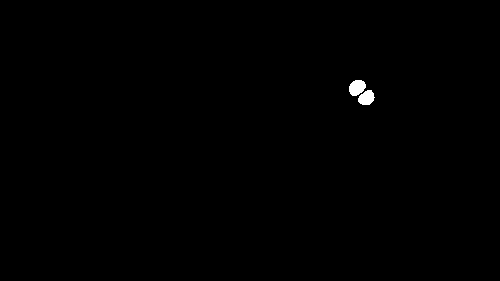

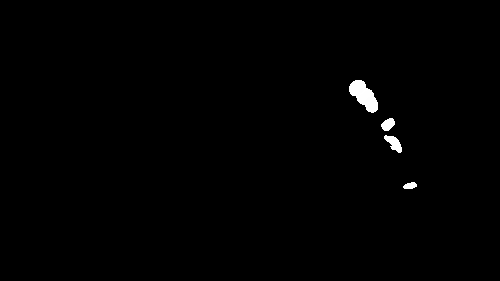

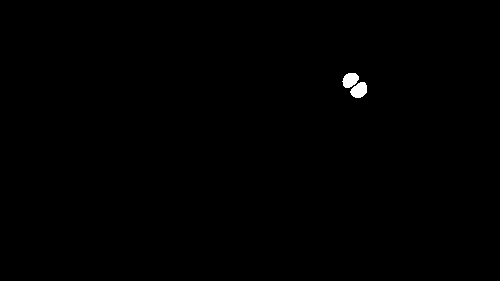

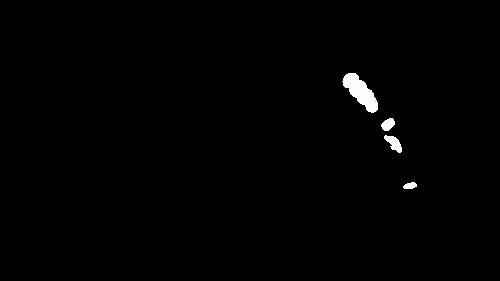

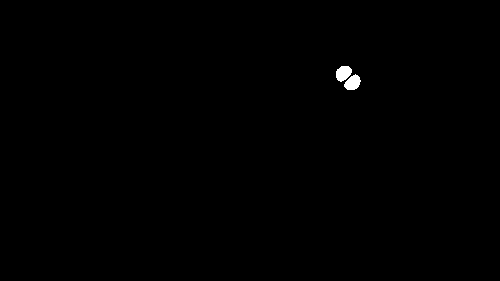

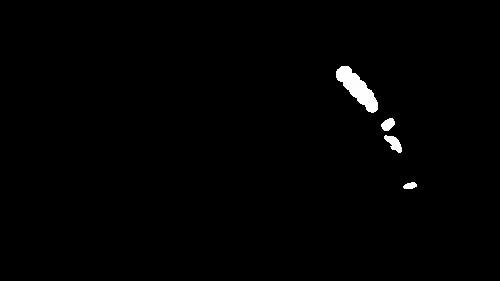

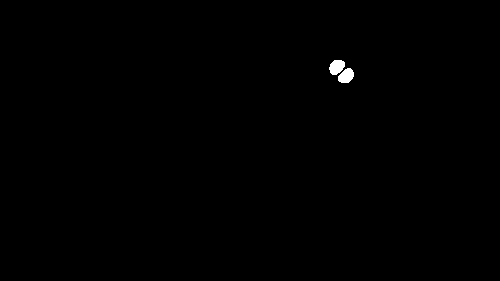

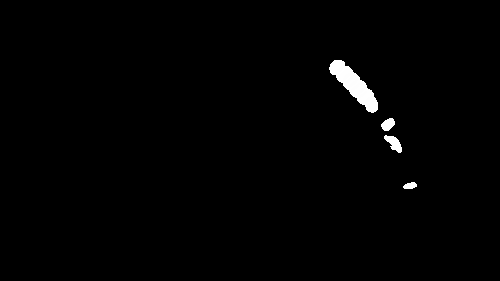

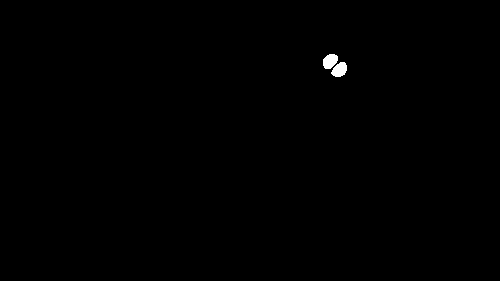

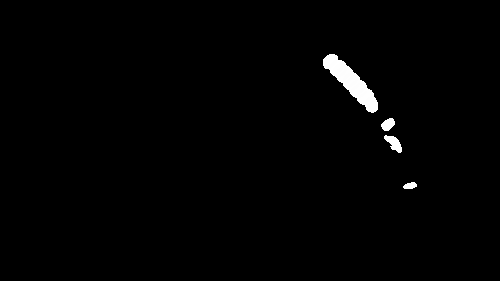

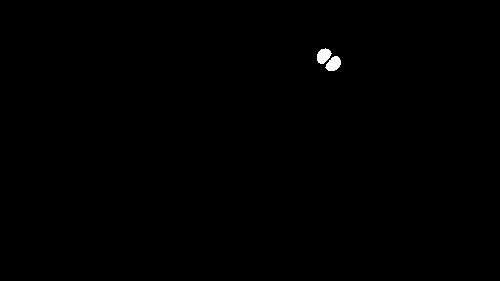

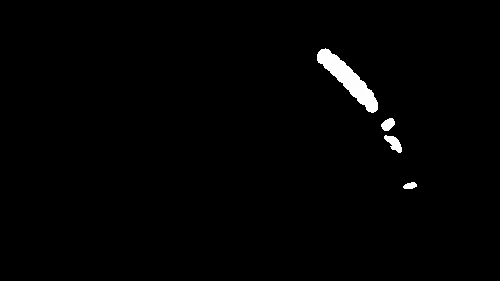

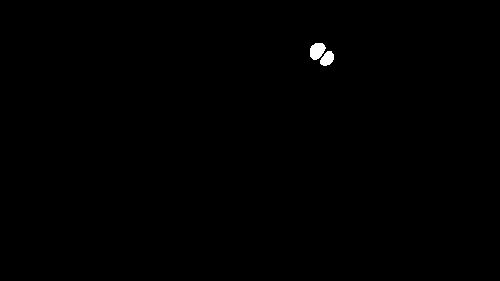

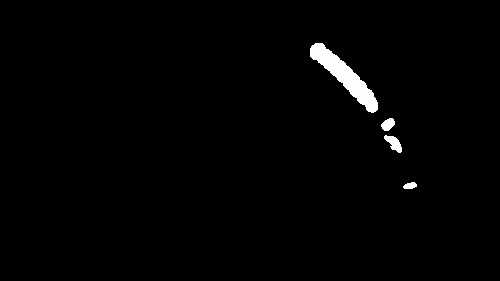

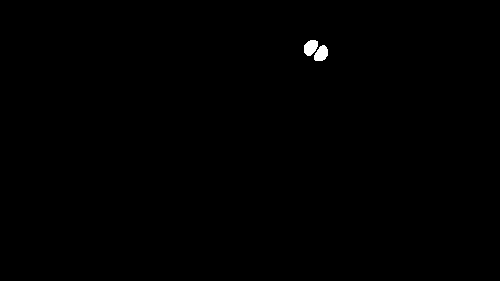

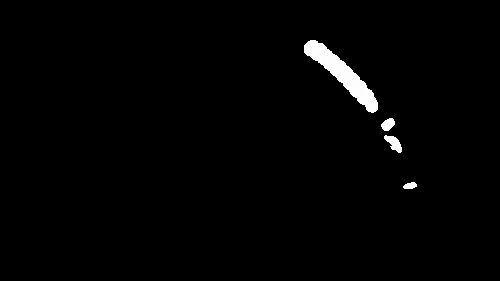

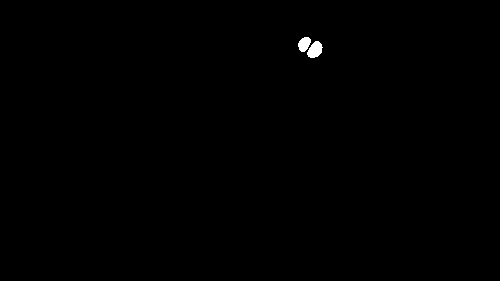

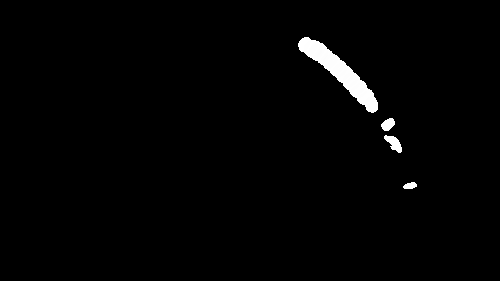

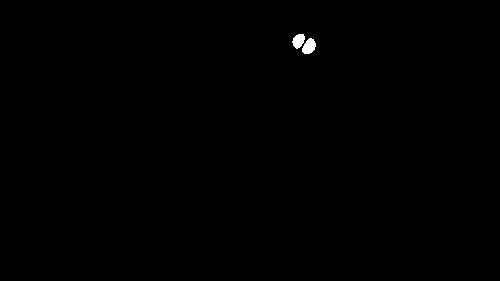

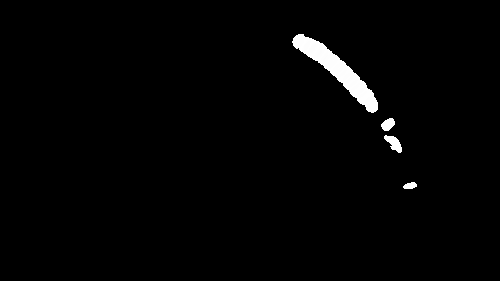

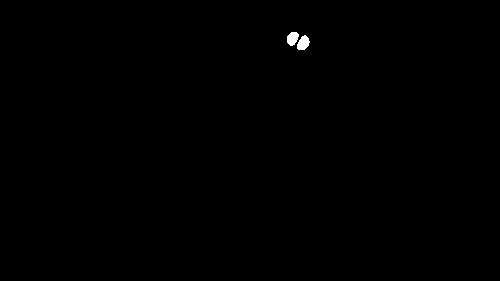

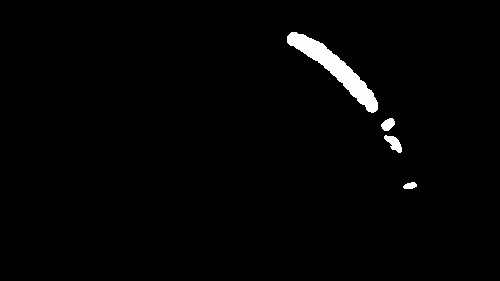

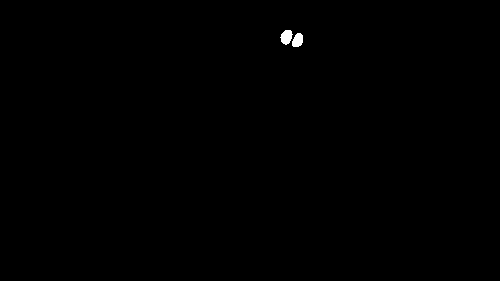

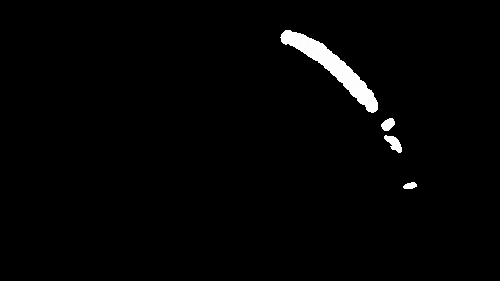

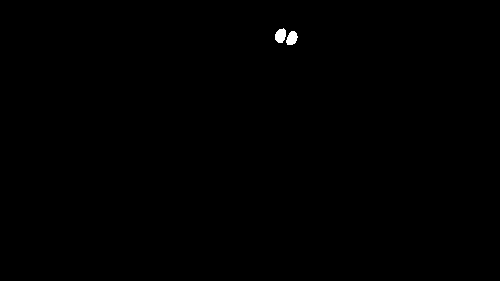

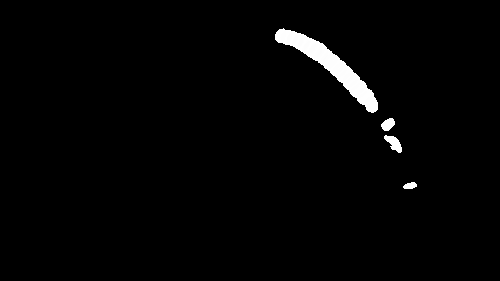

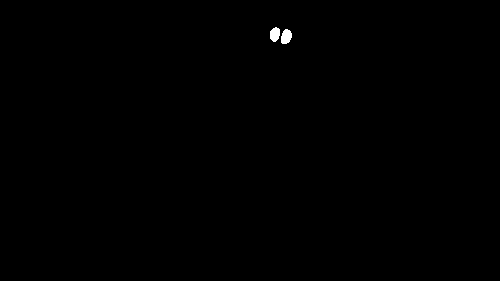

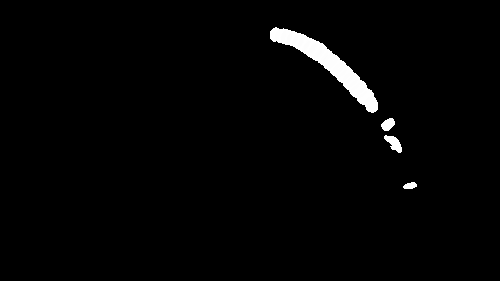

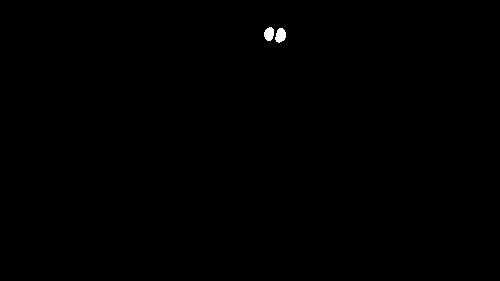

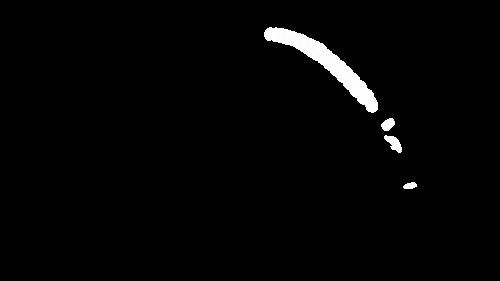

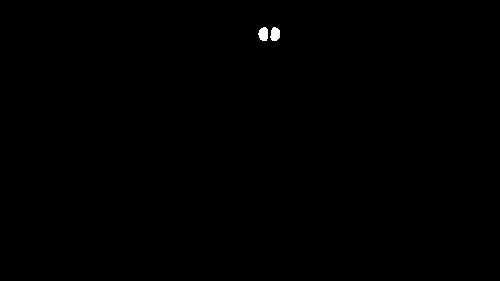

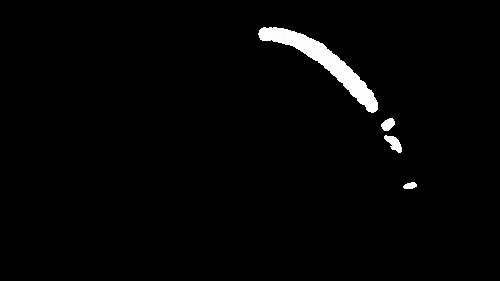

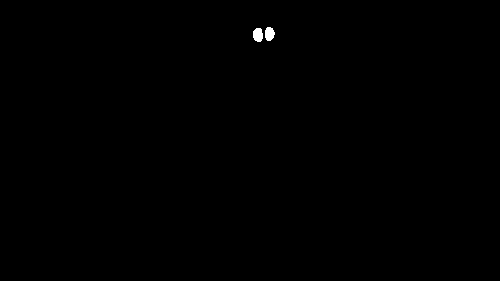

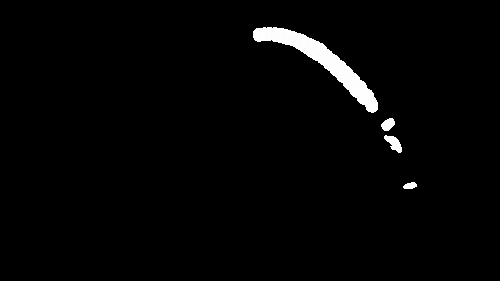

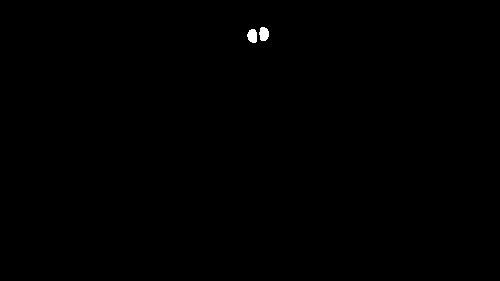

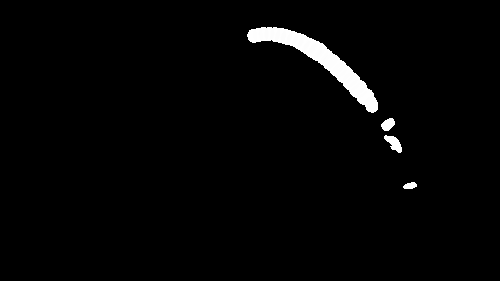

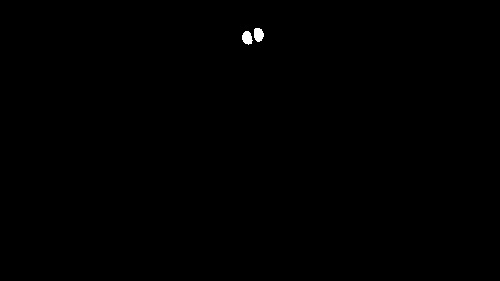

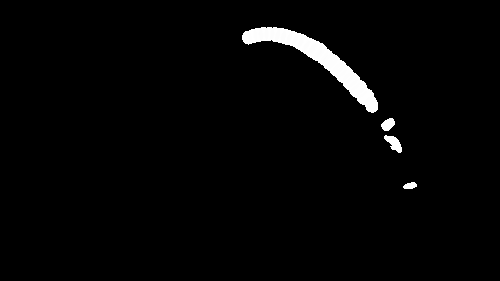

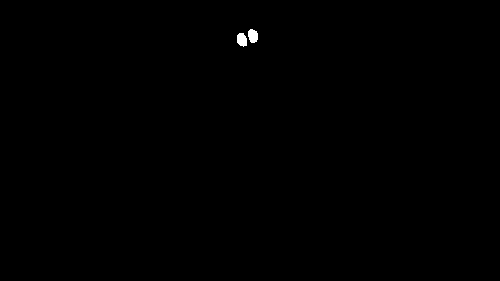

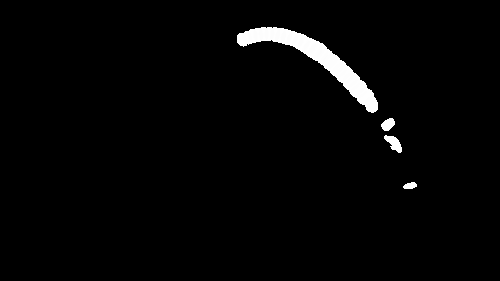

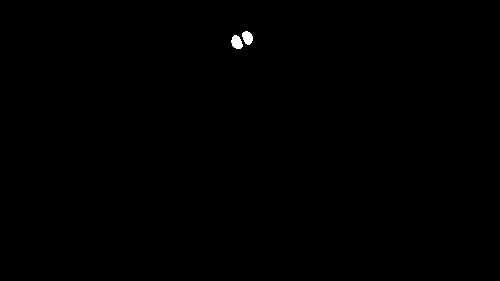

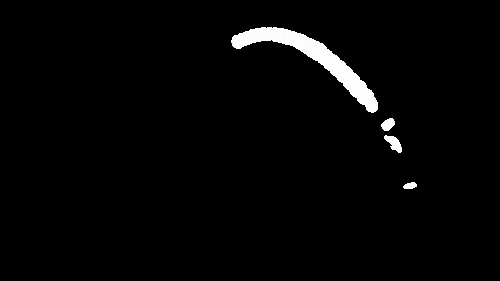

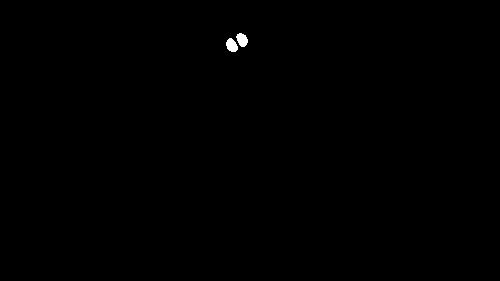

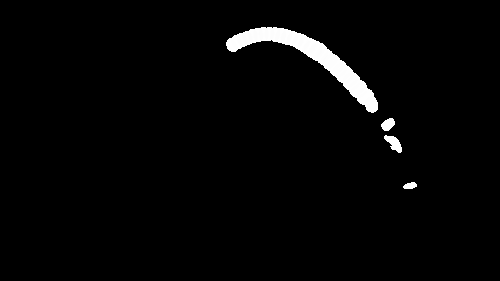

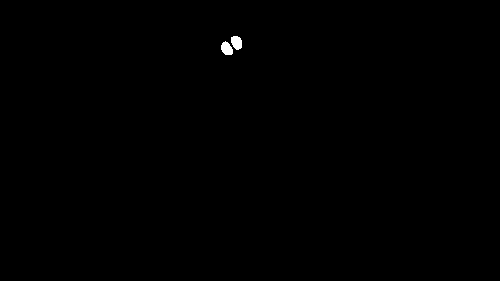

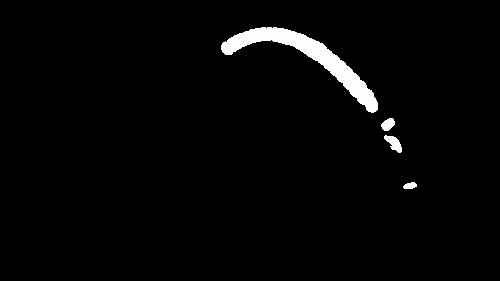

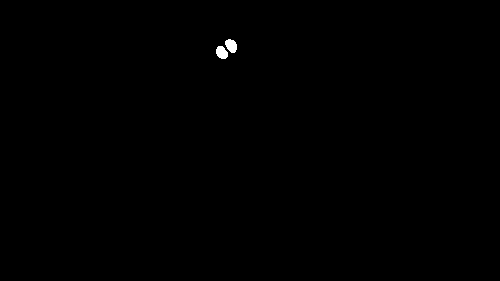

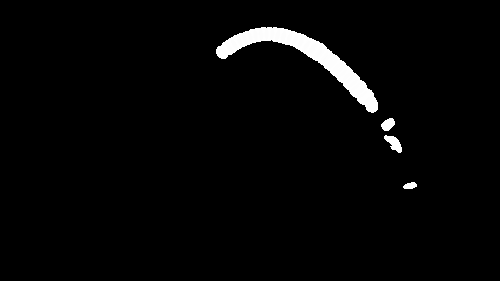

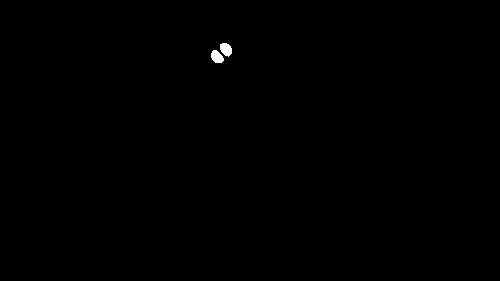

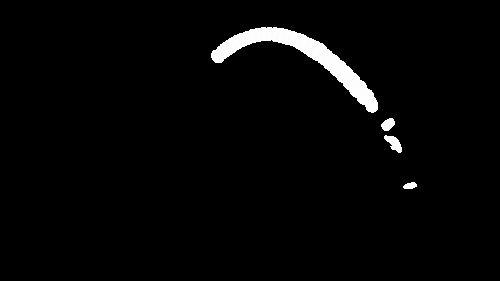

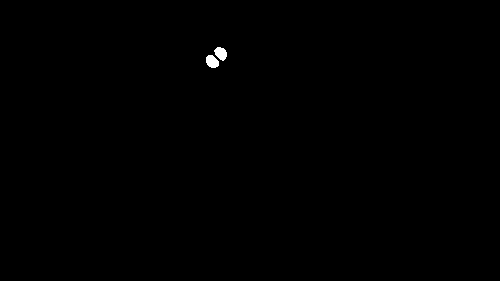

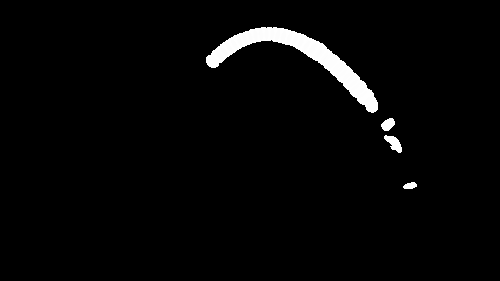

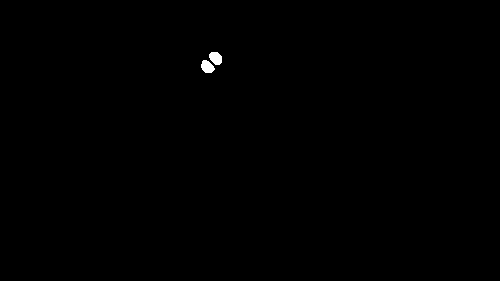

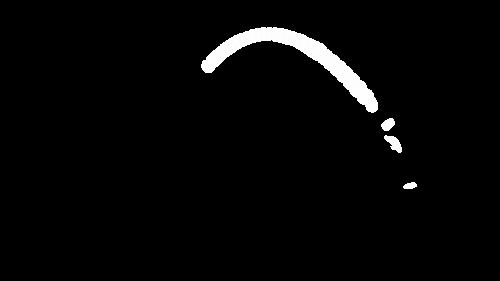

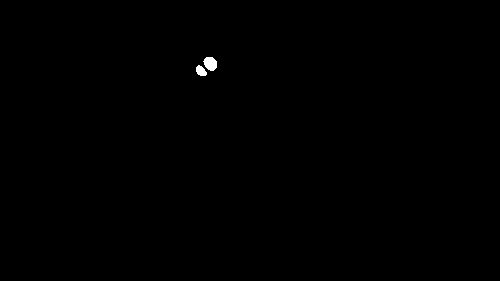

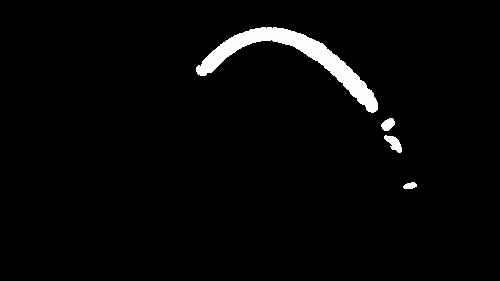

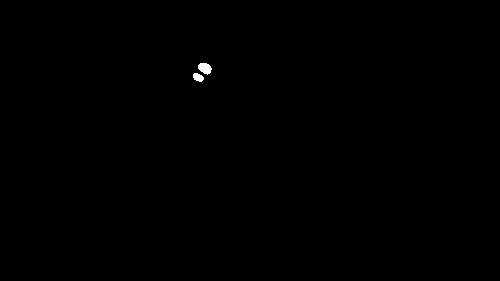

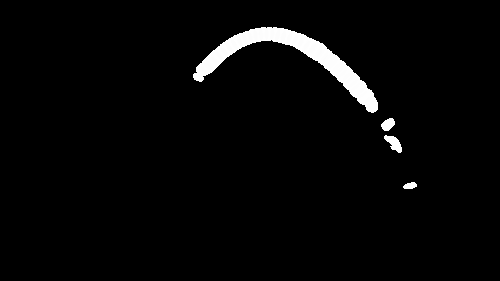

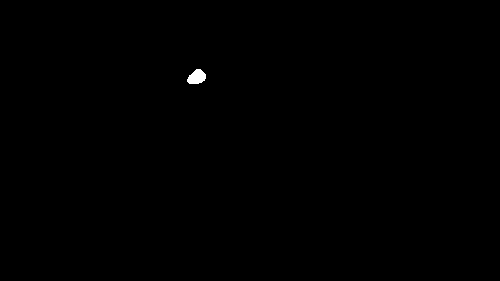

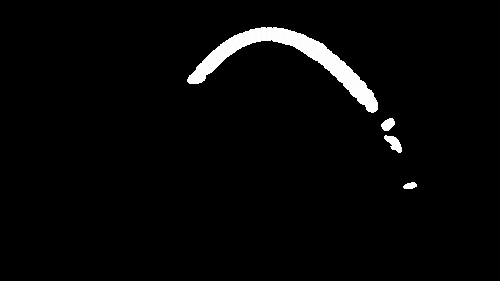

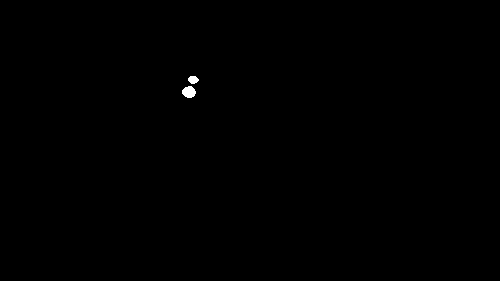

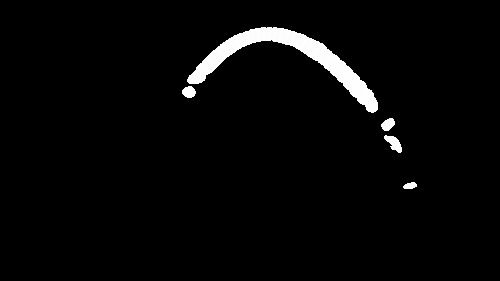

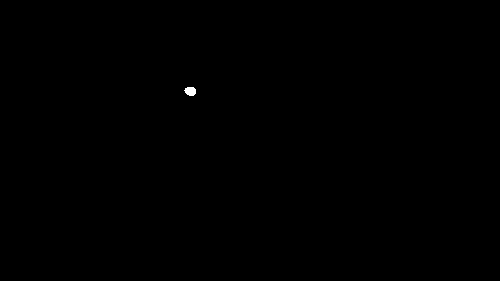

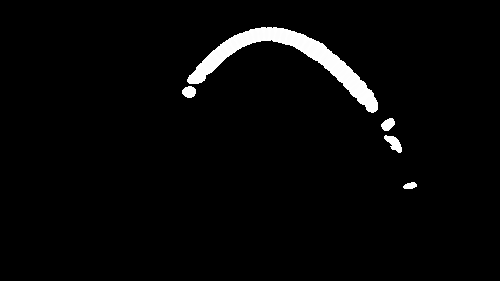

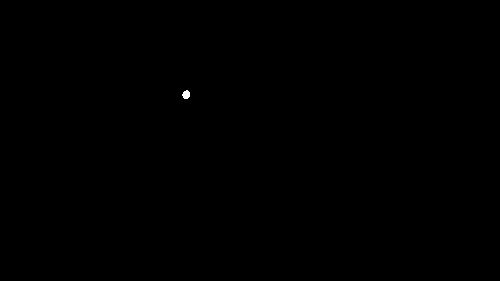

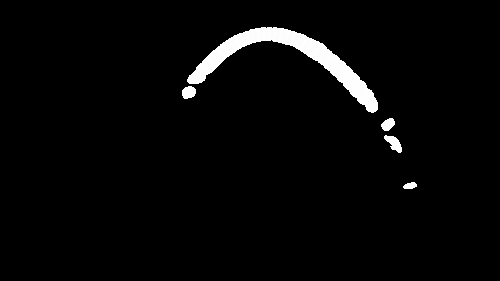

In [4]:
while True:

	# fetch frame
	frame = vs.read()
	frame = frame[1]

  # if none left end loop
	if frame is None:
		break

	# check if first frame was fetched
	if firstFrame is not None:
		prevFrame = gray

	# change size, convert to grayscale and blur
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray, (21, 21), 0)

	if firstFrame is None:
		firstFrame = gray
		continue

	# compute the difference between this and prev frame
	frameDelta = cv2.absdiff(prevFrame, gray)
 
	# threshold for motion detection
	thresh = cv2.threshold(frameDelta, 15, 255, cv2.THRESH_BINARY)[1]



	# sum of last 40 frames
	if resultAsSum is None:
		resultAsSum = thresh
	if len(framesSummed) > 40:
		resultAsSum += thresh
		framesSummed.append(thresh)
		resultAsSum -= framesSummed[0]
		framesSummed.pop(0)
	else:
		resultAsSum += thresh
		framesSummed.append(thresh)


	cv2_imshow(thresh)

	cv2_imshow(resultAsSum)
	key = cv2.waitKey(1) & 0xFF


# Representing the shot as data points

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as image
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from numpy import asarray

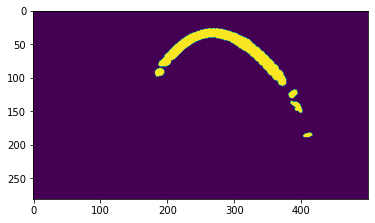

In [6]:
plt.imshow(resultAsSum)
plt.show()

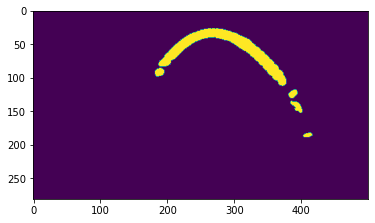

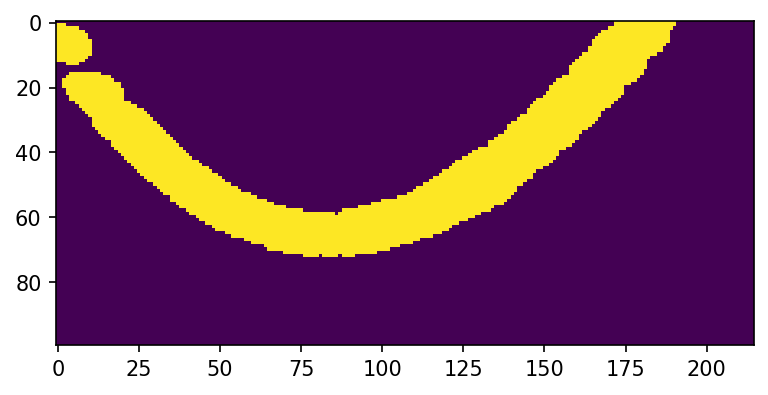

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(281, 500)


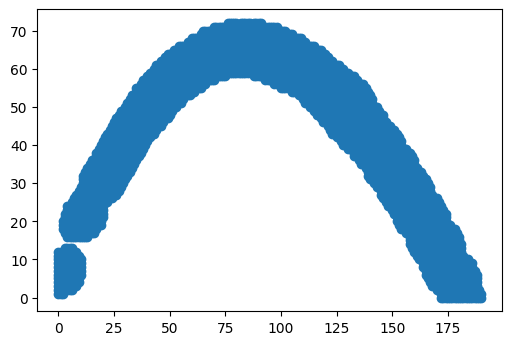

In [7]:
image = resultAsSum
plt.imshow(image)

trail_frame = np.clip(image, 0, 1).astype(np.uint8)


x_lim = 100 
y_lim = 400 
plt.imshow(trail_frame)

cropped_trail = trail_frame[:x_lim, 185:y_lim][::-1,::1]
plt.figure(dpi=150)
plt.grid(False)

plt.imshow(cropped_trail)
plt.show()

# Tutaj testy
data = asarray(cropped_trail)
print(data)
print(trail_frame.shape)

points = []
for i in range(x_lim):
  for j in range(y_lim-185):
    if data[i][j] > 0:
      points.append([j, i])



plt.figure(dpi=100)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
plt.scatter(xs, ys)

# ------------- TESTY ---------------



In [8]:
import tensorflow as tf

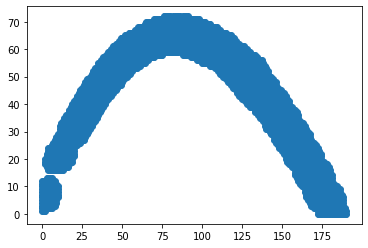

In [9]:
plt.scatter(xs, ys)

#Trajectory Fitting

In [10]:
# initializing force and angle variables
angle_variable = tf.Variable(40.0, name='angle_constant')
force_variable = tf.Variable(50.0, name='force_constant')

my_variables = [angle_variable, force_variable]

In [11]:
# degrees to radians transform

def deg2rad(deg):
    pi_on_180 = 0.017453292519943295
    return deg * pi_on_180

def run_model(x):
  tf_lhs = x * tf.tan(deg2rad(angle_variable))
  tf_rhs_top = 9.8 * x ** 2
  tf_rhs_bottom = (2*(force_variable)**2) * (tf.cos( deg2rad(angle_variable))**2)
  output = tf_lhs - (tf_rhs_top / tf_rhs_bottom)
  return output

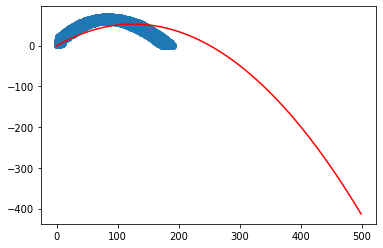

In [12]:
plt.scatter(xs, ys)
plt.plot(np.arange(500), run_model(np.arange(500)),c='r')
plt.show()

In [13]:
optimiser = tf.optimizers.Adam(learning_rate=1)

In [16]:
for i in range(len(xs)):

  with tf.GradientTape() as tape:
    loss = tf.losses.mean_squared_error(ys, run_model(xs[i]))

  grads = tape.gradient(loss, my_variables)
  optimiser.apply_gradients(zip(grads, my_variables))

  # print values every 100 loops
  if (i % 100) == 0:
    print(my_variables[0].numpy() , my_variables[1].numpy())

40.739468 44.76289
40.944374 50.0675
47.792976 48.316383
49.445038 47.560184
46.68425 47.795456
48.47867 47.067413
73.45926 49.698765
39.207 48.61898
41.99525 48.269066
44.87207 46.395145
46.407272 45.215656
47.854824 48.85382
48.16423 49.600674
47.731594 47.23545
45.917137 42.829754
44.828953 42.40635
44.48056 43.391506
43.8881 42.962822
43.382904 42.17148
43.825336 43.523685
45.933815 47.2958
45.55706 47.96162
42.950882 46.50534
40.183643 43.06439
43.201836 47.6139
40.664707 45.595493
38.713627 44.940357
39.22701 45.852768
41.366375 46.69023
42.39697 46.94321
39.096664 44.65403
40.0954 45.62666
39.9521 45.224934
41.008816 45.789333
40.29906 44.5195


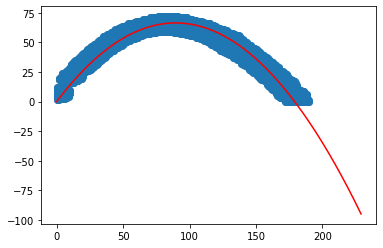

In [17]:
# Manual data modification

angle_variable = tf.Variable(56.0, name='angle_constant')
force_variable = tf.Variable(43.5, name='force_constant')
# print(my_variables)

# Fitting
plt.scatter(xs, ys)
plt.plot(np.arange(230), run_model(np.arange(230)),c='r')
plt.show()

#Voilà! 
##The angle is shown as "numpy = {arc}": 



In [18]:
print(angle_variable)

<tf.Variable 'angle_constant:0' shape=() dtype=float32, numpy=56.0>
